# Q1

A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm

In [2]:
# Import Dataset
cutlets = pd.read_csv('Cutlets.csv')
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


Assume Null hyposthesis as Ho: μ1 = μ2 (There is no difference in diameters of cutlets between two units)
Thus Alternate hypothesis as Ha: μ1 ≠ μ2 (There is significant difference in diameters of cutlets between two units)

2 Sample 2 Tail test applicable

In [3]:
cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [4]:
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 692.0 bytes


In [5]:
# 2-sample 2-tail ttest
# ind -> independent samples
s=stats.ttest_ind(cutlets['Unit A'], cutlets['Unit B'])
s

TtestResult(statistic=0.7228688704678063, pvalue=0.4722394724599501, df=68.0)

In [6]:
p = s[1]
p

0.4722394724599501

In [7]:
# compare p_value with α = 0.05

In [8]:
if p < 0.05:
    print('Reject Null Hypothesis. There is significant difference in diameters of cutlets between two units.')
else:
    print('Fail to reject Null Hypothesis.  There is no difference in diameters of cutlets between two units.')

Fail to reject Null Hypothesis.  There is no difference in diameters of cutlets between two units.


# Q2

A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

In [9]:
# load the dataset
labtat=pd.read_csv('LabTAT.csv')
labtat.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


Anova test : Analysis of varaince between more than 2 samples or columns

Assume Null Hypothesis Ho as No Varaince: All samples TAT population means are same
Thus Alternate Hypothesis Ha as It has Variance: Atleast one sample TAT population mean is different 

In [10]:
# Anova test
f, p=stats.f_oneway(labtat['Laboratory 1'], labtat['Laboratory 2'], labtat['Laboratory 3'], labtat['Laboratory 4'])

In [11]:
if p < 0.05:
    print('Reject Null Hypothesis. Atleast one sample TAT population mean is different .')
else:
    print('Fail to reject Null Hypothesis. All samples TAT population means are same')

Reject Null Hypothesis. Atleast one sample TAT population mean is different .


# Q3

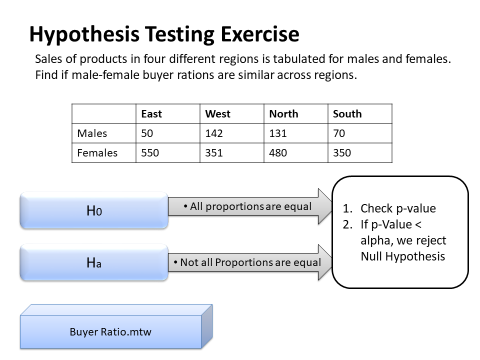

In [12]:
from scipy.stats import chi2_contingency

Null Hypothesis Ho: 
Categorical variables are independence (male-female buyer rations are similar across regions (does not vary and are not related)

Alternate Hypothesis Ha: 
Categorical variables are dependence (male-female buyer rations are NOT similar across regions (does vary and somewhat/significantly related)

In [13]:
# load the dataset
buyer=pd.read_csv('BuyerRatio.csv')
buyer

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [14]:
# Make dimensional array
obs=np.array([[50,142,131,70],[435,1523,1356,750]])
obs

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]])

In [15]:
# Chi2 contengency independence test
chi2, p, df, exp = chi2_contingency(obs)

In [16]:
# Compare p_value with α = 0.05

In [17]:
if p < 0.05:
    print('Reject Null Hypothesis. Categorical variables are dependence male-female buyer rations are NOT similar across regions.')
else:
    print('Fail to reject Null Hypothesis. Categorical variables are independence male-female buyer rations are similar across regions. ')

Fail to reject Null Hypothesis. Categorical variables are independence male-female buyer rations are similar across regions. 


# Q4

TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences


In [18]:
# load the dataset
cof=pd.read_csv('Costomer+OrderForm.csv')
cof.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [19]:
cof

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [20]:
cof.Phillippines.value_counts()

Phillippines
Error Free    271
Defective      29
Name: count, dtype: int64

In [21]:
cof.Indonesia.value_counts()

Indonesia
Error Free    267
Defective      33
Name: count, dtype: int64

In [22]:
cof.Malta.value_counts()

Malta
Error Free    269
Defective      31
Name: count, dtype: int64

In [23]:
cof.India.value_counts()

India
Error Free    280
Defective      20
Name: count, dtype: int64

In [24]:
# Make a contingency table
obs=np.array([[271,267,269,280],[29,33,31,20]])
obs

array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

Null Hypothesis as Ho: 
Categorical variables are independence (customer order forms defective %  does not varies by centre)

Thus, Alternative hypothesis as Ha:
Categorical variables are Dependence (customer order forms defective %  varies by centre)

In [25]:
# Chi2 contengency independence test
chi2, p, df, exp = chi2_contingency(obs)

In [26]:
# Compare p_value with α = 0.05

In [27]:
if p < 0.05:
    print('Reject Null Hypothesis. Categorical variables are Dependence customer order forms defective %  varies by centre.')
else:
    print('Fail to reject Null Hypothesis. Categorical variables are independence customer order forms defective %  does not varies by centre.')

Fail to reject Null Hypothesis. Categorical variables are independence customer order forms defective %  does not varies by centre.
